## Final Project Submission

Please fill out:
* Student name:   Mucui Bernard
* Student pace:   part time
* Scheduled project review date/time:   16/04/2023
* Instructor name:  Everlyn Asiko
* Blog post URL:


# Introduction:

Microsoft is launching a new movie studio and wants to understand the current market trends to make informed decisions about the type of movies to produce. In this exploratory analysis, we will focus on the original language, return on investment (ROI), and vote average to identify popular movie trends and help Microsoft make data-driven decisions.

# Data:

To perform this analysis, we will use data from various sources, including Box Office Mojo, IMDB, Rotten Tomatoes, The MovieDB, and The Numbers.
These datasets contain essential information about movies, such as box office earnings, budget, language, and ratings.

- bom.movie_gross.csv.gz: This dataset contains information about movie gross earnings, studio, and release date from Box Office Mojo.
- tmdb.movies.csv.gz: This dataset contains information about movies including budget, revenue, genres, and release date from The Movie Database.
- tn.movie_budgets.csv.gz: This dataset contains information about movie budgets, revenue, and release date from The Numbers.
- rt.movie_info.tsv.gz: This dataset contains information about movie ratings, genres, directors, and actors from Rotten Tomatoes.

We will use these datasets to explore the relationship between various features such as genre, budget, ratings, and box office performance.

# Features of interest:

We will focus on three main features to guide our analysis:

- Original Language: We will explore the popularity of movies based on the original language used in production.
- Return on Investment (ROI): We will investigate the correlation between a movie's budget and its box office performance to determine the ROI.
- Vote Average: We will examine the relationship between a movie's vote average and its box office earnings to determine if movies with higher vote averages tend to perform better.

- Overall, this analysis aims to provide Microsoft with insights on the popular movie trends based on language, ROI, and vote average to help them make informed decisions about their new movie studio.

# Loading the datasets:
To load and manipulate the above datasets, we will need to import some Python libraries commonly used for data analysis and manipulation. These include:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Now that we have imported the necessary libraries, we can proceed to load the datasets. The datasets are stored in the "zippedData" folder and will need to be extracted before loading.

To load the datasets, we will use the pd.read_csv() function from the pandas library. 
- We will read each dataset and store it in a separate dataframe.
- We will repeat this process for each dataset we want to use in our analysis.

Once the datasets are loaded, we can begin to explore and analyze the data.

In [2]:
# Load the bom.movie_gross.csv.gz file
bom_df = pd.read_csv("zippedData/bom.movie_gross.csv.gz")

# Load the tmdb.movies.csv.gz file
tmdb_df = pd.read_csv("zippedData/tmdb.movies.csv.gz",index_col=0)

# Load the tn.movie_budgets.csv.gz file
tn_df = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")

# Load the rt.movie_info.tsv.gz file
rt_df = pd.read_table("zippedData/rt.movie_info.tsv.gz")


To verify that the datasets have been loaded correctly and to get a glimpse of what the data looks like, we will use the head() method in pandas to display the first five rows of each dataset.

This will allow us to check that the data has been loaded correctly and to get a better understanding of the structure and format of the data.

In [3]:
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
tmdb_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [5]:
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [6]:
rt_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


# Exploring the datasets:

Before we start analyzing the data, we need to explore the datasets to understand their structure and format. Here are some steps we can take to explore the data:

- We can start by checking the shape of each dataframe, which will give us the number of rows and columns in each dataset.
- Next, we can use the info() method to get an overview of the data types in each column and check for any missing values.
- To get a better idea of what the data looks like, we can take a random sample of rows from each dataset.
- We can also use the .describe() method to get summary statistics for the numerical columns in the dataframes.
- To check for missing values in each column, we can use the .isnull() method to create a boolean mask and then use the .sum() method to get the count of missing values per column.
- Finally, we can check for any duplicates in the dataset using the .duplicated() method and get the count of duplicates using the .sum() method.

 # Exploring dataset 1: bom_df

In [7]:
# Check the number of rows and columns in each dataframe
bom_df.shape

(3387, 5)

In [8]:
# Get an overview of the data types of each column, and check if there are any missing values
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [9]:
# View a few random rows of the dataframe to get a sense of what the data looks like
bom_df.sample(5)

,title,studio,domestic_gross,foreign_gross,year
104,The Switch,Mira.,27800000.0,22100000,2010
3334,The Captain,MBox,109000.0,NaN,2018
513,In a Better World,SPC,1000000.0,8600000,2011
326,Kimjongilia,Lorb.,4400.0,NaN,2010
343,The Adventures of Tintin,Par.,77600000.0,296400000,2011


In [10]:
# Generate summary statistics for the numeric columns in the dataframe
bom_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [11]:
bom_df.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [12]:
bom_df.duplicated().sum()

0

# Exploring dataset 2: tmdb_df

In [13]:
# Check the number of rows and columns in each dataframe
tmdb_df.shape

(26517, 9)

In [14]:
# Get an overview of the data types of each column, and check if there are any missing values
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [15]:
# View a few random rows of the dataframe to get a sense of what the data looks like
tmdb_df.sample(5)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
20241,"[18, 28]",523640,en,Fade Away,0.600,2016-01-01,Fade Away,6.0,1
20565,[],393154,en,The Amityville Legacy,0.600,2016-06-01,The Amityville Legacy,1.7,3
14290,"[35, 27]",246741,en,What We Do in the Shadows,11.186,2015-02-13,What We Do in the Shadows,7.6,1594
19926,[18],467965,en,The Next Two Nights,0.600,2016-10-15,The Next Two Nights,9.0,1
22699,"[53, 18]",365886,en,Chasing Valentine,0.840,2015-10-23,Chasing Valentine,5.5,3


In [16]:
# Generate summary statistics for the numeric columns in the dataframe
tmdb_df.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


In [17]:
tmdb_df.isnull().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [18]:
tmdb_df.duplicated().sum()

1020

# Exploring dataset 3: tn_df

In [19]:
# Check the number of rows and columns in each dataframe
print(tn_df.shape)

(5782, 6)


In [20]:
# Get an overview of the data types of each column, and check if there are any missing values
print(tn_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None


In [21]:
# View a few random rows of the dataframe to get a sense of what the data looks like
tn_df.sample(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5286,87,"Aug 31, 2001",Speedway Junky,"$1,000,000","$17,127","$17,127"
2273,74,"Sep 9, 2011",Warrior,"$25,000,000","$13,657,115","$24,215,385"
1767,68,"Sep 5, 2014",Thunder and the House of Magic,"$34,000,000","$4,091","$62,582,520"
1738,39,"Mar 11, 2016",The Brothers Grimsby,"$35,000,000","$6,864,016","$28,720,470"
1834,35,"Oct 20, 1995",Get Shorty,"$30,250,000","$72,021,008","$115,021,008"


In [22]:
# Generate summary statistics for the numeric columns in the dataframe
print(tn_df.describe())

                id
count  5782.000000
mean     50.372363
std      28.821076
min       1.000000
25%      25.000000
50%      50.000000
75%      75.000000
max     100.000000


In [23]:
#check count of null values in the columns
tn_df.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [24]:
#check count of if duplicates rows in the datasets
tn_df.duplicated().sum()

0

# Explore dataset 4: rt_df

In [25]:
# Check the number of rows and columns in each dataframe
print(rt_df.shape)


(1560, 12)


In [26]:
# Get an overview of the data types of each column, and check if there are any missing values
print(rt_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB
None


In [27]:
# View a few random rows of the dataframe to get a sense of what the data looks like
rt_df.sample(5)


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
462,605,Saturday Night Live star Chris Farley had his ...,PG-13,Comedy|Special Interest,Peter Segal,Bonnie Turner,"Mar 31, 1995","Nov 9, 1999",NaN,NaN,95 minutes,NaN
468,612,Actors Woody Harrelson and Wesley Snipes team ...,R,Action and Adventure|Comedy|Drama|Mystery and ...,Joseph Ruben,David Loughery|Doug Richardson,"Nov 22, 1995","May 22, 2001",NaN,NaN,110 minutes,NaN
1464,1884,What do you get when you mix fearless comedic ...,PG-13,Comedy,David Zucker,Craig Mazin|David Zucker,"Apr 14, 2006","Aug 15, 2006",$,"90,672,025",83 minutes,Weinstein Co.
1292,1669,"In a world where journalism is under attack, M...",R,Drama,Matthew Heineman,Arash Amel,NaN,NaN,NaN,NaN,106 minutes,Aviron Pictures
1264,1631,Originally issued under the title Appuntamento...,NR,Art House and International|Mystery and Suspense,Antonio Bonifacio,NaN,NaN,NaN,NaN,NaN,88 minutes,NaN


In [28]:
# Generate summary statistics for the numeric columns in the dataframe
print(rt_df.describe())


                id
count  1560.000000
mean   1007.303846
std     579.164527
min       1.000000
25%     504.750000
50%    1007.500000
75%    1503.250000
max    2000.000000


In [29]:
#Let check for count of null values in the columns
print(rt_df.isnull().sum())


id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64


In [30]:
#let's check for duplicates
print(rt_df.duplicated().sum())

0


# Cleaning  the datasets:
To clean our datasets, we will follow these steps:

We will address missing values in our datasets by using methods like dropna(), fillna(), or leaving the columns as they are if the missing values are not significant.

We will convert the data types of columns to the correct format using the astype() method.

We will also consider dropping unnecessary columns using the drop() method.

To start with the bom_df dataset,which has missing values in the studio column,
- We intend to drop them since there are very few missing values and it's not easy to replace a categorical column.
- For the domestic_gross column, which has 28 missing values, we will replace the missing values with the mean.
- For the foreign_gross column, which has 1,350 missing values, there's a possibility that there were no international releases,  so we will assign a value of 0.
- Lastly, we will convert the year column to an object and the foreign_gross column to a float data type.

In [31]:
bom_df["studio"] = bom_df["studio"].dropna()
bom_df["foreign_gross"] = bom_df["foreign_gross"].fillna(0)
bom_df["studio"] = bom_df["studio"].dropna()
bom_df["domestic_gross"] = bom_df["domestic_gross"].fillna(bom_df["domestic_gross"].mean())


In [32]:
bom_df["year"] = bom_df["year"].astype(str)
bom_df['foreign_gross'] = bom_df['foreign_gross'].str.replace('$', '').str.replace(',', '').astype(float)

In [33]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   object 
dtypes: float64(2), object(3)
memory usage: 132.4+ KB


In [34]:
bom_df.isnull().sum()

title                0
studio               5
domestic_gross       0
foreign_gross     1350
year                 0
dtype: int64

Let's proceed to dataset 2,
tmdb_df has some duplicates rows, we will drop them

secondly ,we will drop the id column since it doesn't add any value to our analysis considering it's not a unique identifier of our dataset.

In [35]:
tmdb_df = tmdb_df.drop_duplicates()

In [36]:
tmdb_df = tmdb_df.drop("id", axis=1)

In [37]:
tmdb_df.duplicated().sum()

0

During our exploration of Dataset 3 (tn_df), we discovered that the columns 'production_budget', 'domestic_gross', and 'worldwide_gross' have the wrong data types and are currently stored as objects. 
- To ensure consistency in column naming across the datasets, we will rename the 'movie' column to 'title'. 
- To enable us to conduct summary statistics on the aforementioned columns, we need to convert them to float data type.

In [38]:
tn_df["production_budget"] = tn_df["production_budget"].str.replace('$', '').str.replace(',', '').astype(int)
tn_df["domestic_gross"] = tn_df["domestic_gross"].str.replace('$', '').str.replace(',', '').astype(float)
tn_df["worldwide_gross"] = tn_df["worldwide_gross"].str.replace('$', '').str.replace(',', '').astype(float)
tn_df.rename(columns={'movie': 'title'}, inplace=True)

In [39]:
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   title              5782 non-null   object 
 3   production_budget  5782 non-null   int32  
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(2), int32(1), int64(1), object(2)
memory usage: 248.6+ KB


In Dataset 4 (rt_df), we observed that almost all columns have missing data, and since most of them are categorical, it may not be feasible to fill in the missing values.
Therefore, we will drop any column with more than 70% missing data. Specifically, we will drop the columns 'currency' and 'box_office'

In [40]:
rt_df = rt_df.drop("currency",axis=1)

In [41]:
rt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   box_office    340 non-null    object
 9   runtime       1530 non-null   object
 10  studio        494 non-null    object
dtypes: int64(1), object(10)
memory usage: 134.2+ KB


In [42]:
rt_df= rt_df.loc[:, ['box_office', 'studio','runtime','genre','rating' ]]

In [43]:
rt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   box_office  340 non-null    object
 1   studio      494 non-null    object
 2   runtime     1530 non-null   object
 3   genre       1552 non-null   object
 4   rating      1557 non-null   object
dtypes: object(5)
memory usage: 61.1+ KB


In [44]:
rt_df.isnull().sum()

box_office    1220
studio        1066
runtime         30
genre            8
rating           3
dtype: int64

# Merging the  datasets

After cleaning and exploring the datasets, we are now ready to merge the datasets of interest that will allow us to conduct further analysis to answer our research question/hypothesis.

We will merge three dataframes: bom_df, tmdb_df, and tn_df. These dataframes have a common column named title/movie, which we will use as the key to merge the datasets.

In [45]:
#let's confirm the columns in the selected 3 datasets
print(bom_df.columns)
print(tmdb_df.columns)
print(tn_df.columns)

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')
Index(['genre_ids', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')
Index(['id', 'release_date', 'title', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')


In [46]:
# let's merge the first two datasets bom_df and tmdb_df and assign it to a variable name , merged_df1
Merged_df1= pd.merge(bom_df,tmdb_df ,on='title',how = "inner")
Merged_df1.head()

,title,studio,domestic_gross,foreign_gross,year,genre_ids,original_language,original_title,popularity,release_date,vote_average,vote_count
0,Toy Story 3,BV,415000000.0,652000000.0,2010,"[16, 10751, 35]",en,Toy Story 3,24.445,2010-06-17,7.7,8340
1,Inception,WB,292600000.0,535700000.0,2010,"[28, 878, 12]",en,Inception,27.920,2010-07-16,8.3,22186
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,"[35, 12, 14, 16, 10751]",en,Shrek Forever After,15.041,2010-05-16,6.1,3843
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,"[12, 14, 18, 10749]",en,The Twilight Saga: Eclipse,20.340,2010-06-23,6.0,4909
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,"[12, 28, 878]",en,Iron Man 2,28.515,2010-05-07,6.8,12368


In [47]:
# let's merge the now newly created dataset with the tn_df datasets and assign it to a variable name , merged_df2
Merged_df2 = pd.merge(Merged_df1,tn_df,on='title',how = "inner")

#let's have an overview of the newly created merged dataset merged_df2
Merged_df2.head()

,title,studio,domestic_gross_x,foreign_gross,year,genre_ids,original_language,original_title,popularity,release_date_x,vote_average,vote_count,id,release_date_y,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,"[16, 10751, 35]",en,Toy Story 3,24.445,2010-06-17,7.7,8340,47,"Jun 18, 2010",200000000,415004880.0,1.068880e+09
1,Inception,WB,292600000.0,535700000.0,2010,"[28, 878, 12]",en,Inception,27.920,2010-07-16,8.3,22186,38,"Jul 16, 2010",160000000,292576195.0,8.355246e+08
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,"[35, 12, 14, 16, 10751]",en,Shrek Forever After,15.041,2010-05-16,6.1,3843,27,"May 21, 2010",165000000,238736787.0,7.562447e+08
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,"[12, 14, 18, 10749]",en,The Twilight Saga: Eclipse,20.340,2010-06-23,6.0,4909,53,"Jun 30, 2010",68000000,300531751.0,7.061028e+08
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,"[12, 28, 878]",en,Iron Man 2,28.515,2010-05-07,6.8,12368,15,"May 7, 2010",170000000,312433331.0,6.211564e+08


In [48]:
#let's have an overview of the bottom rows of newly merged dataset merged_df2
Merged_df2.tail()

,title,studio,domestic_gross_x,foreign_gross,year,genre_ids,original_language,original_title,popularity,release_date_x,vote_average,vote_count,id,release_date_y,production_budget,domestic_gross_y,worldwide_gross
1266,Gotti,VE,4300000.0,NaN,2018,"[80, 18, 36, 53]",en,Gotti,10.034,2018-06-15,5.2,231,64,"Jun 15, 2018",10000000,4286367.0,6089100.0
1267,Bilal: A New Breed of Hero,VE,491000.0,1700000.0,2018,"[28, 12, 16]",en,Bilal: A New Breed of Hero,2.707,2018-02-02,6.8,54,100,"Feb 2, 2018",30000000,490973.0,648599.0
1268,Mandy,RLJ,1200000.0,NaN,2018,[18],en,Mandy,0.600,2016-01-24,3.5,2,71,"Sep 14, 2018",6000000,1214525.0,1427656.0
1269,Mandy,RLJ,1200000.0,NaN,2018,"[28, 53, 27, 14, 9648]",en,Mandy,16.240,2018-09-13,6.2,618,71,"Sep 14, 2018",6000000,1214525.0,1427656.0
1270,Lean on Pete,A24,1200000.0,NaN,2018,"[18, 12]",en,Lean on Pete,9.307,2018-04-06,6.9,133,13,"Apr 6, 2018",8000000,1163056.0,2455027.0


In [49]:
#Observe also the datatypes of the columns to see if they're on their right formats
Merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1271 entries, 0 to 1270
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1271 non-null   object 
 1   studio             1270 non-null   object 
 2   domestic_gross_x   1271 non-null   float64
 3   foreign_gross      1097 non-null   float64
 4   year               1271 non-null   object 
 5   genre_ids          1271 non-null   object 
 6   original_language  1271 non-null   object 
 7   original_title     1271 non-null   object 
 8   popularity         1271 non-null   float64
 9   release_date_x     1271 non-null   object 
 10  vote_average       1271 non-null   float64
 11  vote_count         1271 non-null   int64  
 12  id                 1271 non-null   int64  
 13  release_date_y     1271 non-null   object 
 14  production_budget  1271 non-null   int32  
 15  domestic_gross_y   1271 non-null   float64
 16  worldwide_gross    1271 

In [50]:
Merged_df2.duplicated().sum()

0

# Merged dataset cleaning

After merging the datasets, we have noticed that there are several duplicate columns in the resulting dataframe. To clean the merged dataset, we will drop these duplicate columns and only retain the columns from the original datasets that are relevant for our analysis.

In [51]:
to_drop = ["release_date_y", "domestic_gross_y"]
Merged_df2 = Merged_df2.drop(columns=to_drop)

In [52]:
Merged_df2["profit"] = Merged_df2["worldwide_gross"] - Merged_df2["production_budget"]
Merged_df2["profit_margin"] = (Merged_df2["profit"] / Merged_df2["worldwide_gross"]) * 100

In [53]:
Merged_df2.head()

,title,studio,domestic_gross_x,foreign_gross,year,genre_ids,original_language,original_title,popularity,release_date_x,vote_average,vote_count,id,production_budget,worldwide_gross,profit,profit_margin
0,Toy Story 3,BV,415000000.0,652000000.0,2010,"[16, 10751, 35]",en,Toy Story 3,24.445,2010-06-17,7.7,8340,47,200000000,1.068880e+09,868879522.0,81.288817
1,Inception,WB,292600000.0,535700000.0,2010,"[28, 878, 12]",en,Inception,27.920,2010-07-16,8.3,22186,38,160000000,8.355246e+08,675524642.0,80.850355
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,"[35, 12, 14, 16, 10751]",en,Shrek Forever After,15.041,2010-05-16,6.1,3843,27,165000000,7.562447e+08,591244673.0,78.181664
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,"[12, 14, 18, 10749]",en,The Twilight Saga: Eclipse,20.340,2010-06-23,6.0,4909,53,68000000,7.061028e+08,638102828.0,90.369675
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,"[12, 28, 878]",en,Iron Man 2,28.515,2010-05-07,6.8,12368,15,170000000,6.211564e+08,451156389.0,72.631691


In [54]:
Merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1271 entries, 0 to 1270
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1271 non-null   object 
 1   studio             1270 non-null   object 
 2   domestic_gross_x   1271 non-null   float64
 3   foreign_gross      1097 non-null   float64
 4   year               1271 non-null   object 
 5   genre_ids          1271 non-null   object 
 6   original_language  1271 non-null   object 
 7   original_title     1271 non-null   object 
 8   popularity         1271 non-null   float64
 9   release_date_x     1271 non-null   object 
 10  vote_average       1271 non-null   float64
 11  vote_count         1271 non-null   int64  
 12  id                 1271 non-null   int64  
 13  production_budget  1271 non-null   int32  
 14  worldwide_gross    1271 non-null   float64
 15  profit             1271 non-null   float64
 16  profit_margin      1271 

In [55]:
Merged_df2.isnull().sum()

title                  0
studio                 1
domestic_gross_x       0
foreign_gross        174
year                   0
genre_ids              0
original_language      0
original_title         0
popularity             0
release_date_x         0
vote_average           0
vote_count             0
id                     0
production_budget      0
worldwide_gross        0
profit                 0
profit_margin          0
dtype: int64

In [56]:
#let's fill the missing value on foreign gross with zero, this is so because 
#we might have a zero gross if the release was not done internationally
Merged_df2["foreign_gross"] = Merged_df2["foreign_gross"].fillna(0)

In [57]:
Merged_df2.dropna(inplace= True)

In [58]:
Merged_df2.isnull().sum()

title                0
studio               0
domestic_gross_x     0
foreign_gross        0
year                 0
genre_ids            0
original_language    0
original_title       0
popularity           0
release_date_x       0
vote_average         0
vote_count           0
id                   0
production_budget    0
worldwide_gross      0
profit               0
profit_margin        0
dtype: int64

In [59]:
Merged_df2.columns

Index(['title', 'studio', 'domestic_gross_x', 'foreign_gross', 'year',
       'genre_ids', 'original_language', 'original_title', 'popularity',
       'release_date_x', 'vote_average', 'vote_count', 'id',
       'production_budget', 'worldwide_gross', 'profit', 'profit_margin'],
      dtype='object')

# Visualizing the dataset:

The merged dataset provides us with a wealth of information about the movie industry and can potentially help us answer our research questions. We can leverage various columns such as 'title', 'studio', 'domestic_gross_x', 'foreign_gross', 'year', 'original_language', and 'release_date_x' to gain insights into the movie's distribution and language.

Moreover, we can analyze the popularity and reception of different genres among audiences using the columns 'genre_ids' and 'vote_average'. Lastly, we can use the financial information provided by columns such as 'production_budget', 'worldwide_gross', 'profit', and 'profit_margin' to understand the financial performance of movies and potentially identify the most profitable ones.

To visually represent our findings, we will use different types of plots such as scatter plots, line charts, bar charts, histograms, and box plots, depending on our research questions and areas of interest.

To explore the popularity of movies based on the original language used in production.
- We will start by creating a bar chart to visualize the distribution of movies based on their original language.
- secondly,create a scatter plot to show the relationship between the popularity of movies and the language used. 
This will help us identify which languages are most commonly used in popular movies and potentially draw insights on the preferences of audiences in different regions of the world.

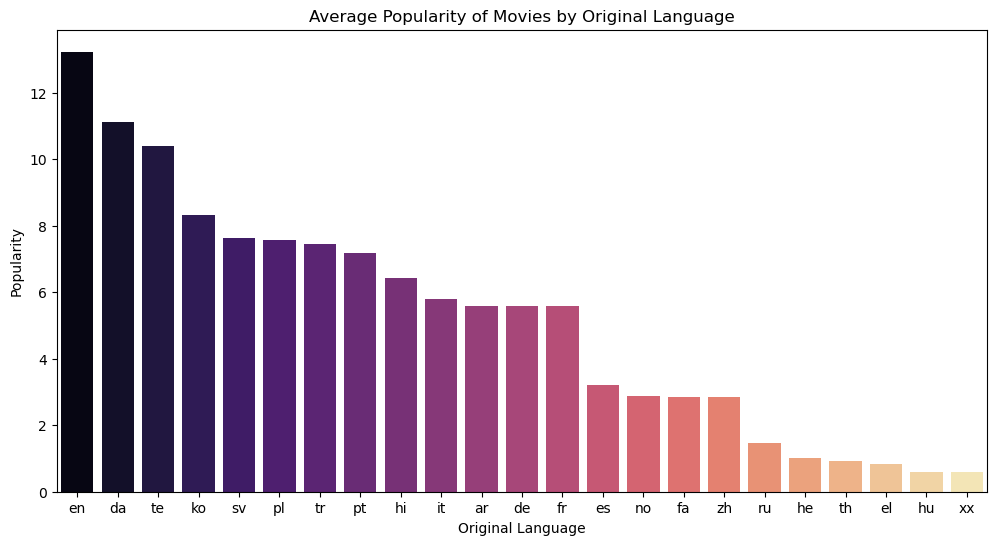

In [60]:
# create a new dataframe with only the columns of interest
language_df = Merged_df2[['title', 'original_language', 'popularity']]

# group the dataframe by original language and calculate the mean popularity of movies in each language
language_popularity = language_df.groupby('original_language')['popularity'].mean().reset_index()

# sort the dataframe by popularity in descending order
language_popularity = language_popularity.sort_values('popularity', ascending=False)

# create a bar chart to visualize the average popularity of movies in each original language
plt.figure(figsize=(12,6))
sns.barplot(x='original_language', y='popularity', data=language_popularity, palette='magma')
plt.title('Average Popularity of Movies by Original Language')
plt.xlabel('Original Language')
plt.ylabel('Popularity')
plt.show()

From the bar chart,It's clearly evident that English language is by far the most common language for movie production in the dataset




Next, let's explore the relationship between a movie's budget and its box office performance to determine the ROI.

To do this we will we create a scatter plot with 'production_budget' on the x-axis and 'worldwide_gross' on the y-axis. This will help us visualize the correlation between a movie's budget and its box office revenue. 

We will then calculate the ROI for each movie by dividing its worldwide gross by its production budget, and plot a histogram to show the distribution of ROI values across all movies. This will give us insights into the profitability of movies and help us identify the most successful ones.

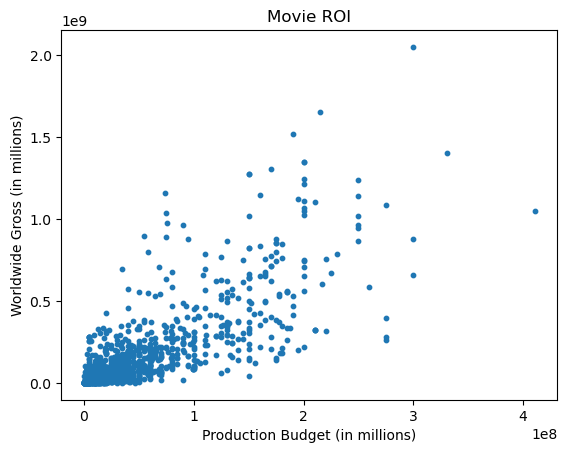

In [61]:
# select relevant columns
roi_df = Merged_df2[['title', 'production_budget', 'worldwide_gross']]

# calculate ROI
roi_df['ROI'] = (roi_df['worldwide_gross'] - roi_df['production_budget']) / roi_df['production_budget']

# plot scatter plot
plt.scatter(roi_df['production_budget'], roi_df['worldwide_gross'], s=10)
plt.xlabel('Production Budget (in millions)')
plt.ylabel('Worldwide Gross (in millions)')
plt.title('Movie ROI')
plt.show()


From the scatter plot, we can observe a positive correlation between a movie's production budget and its worldwide gross revenue, indicating that movies with higher budgets tend to have higher box office performance. However, there are also many data points with low budgets and high revenue, suggesting that a high production budget does not guarantee high box office success. It is important to note that correlation does not necessarily imply causation, and other factors such as marketing and the quality of the movie may also contribute to its success.

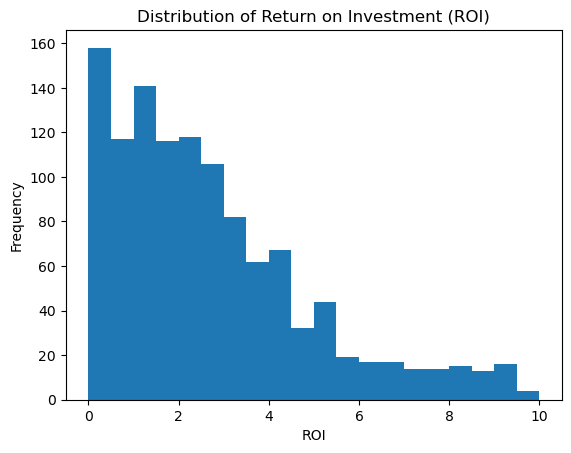

In [62]:
# Calculate ROI for each movie
Merged_df2['ROI'] = Merged_df2['worldwide_gross'] / Merged_df2['production_budget']

# Plot histogram of ROI values
plt.hist(Merged_df2['ROI'], bins=20, range=(0, 10))
plt.title('Distribution of Return on Investment (ROI)')
plt.xlabel('ROI')
plt.ylabel('Frequency')
plt.show()

From the histogram, we can see that the majority of movies have an ROI between 0 and 10, indicating that most movies do not make a significant profit. However, there are a few outliers with much higher ROI values, indicating that there are some highly profitable movies in the dataset. This suggests that the movie industry is highly risky, with only a few movies generating significant profits while the majority do not perform well financially. It also highlights the importance of carefully managing production budgets and finding ways to maximize box office revenue to increase the chances of a movie being financially successful.

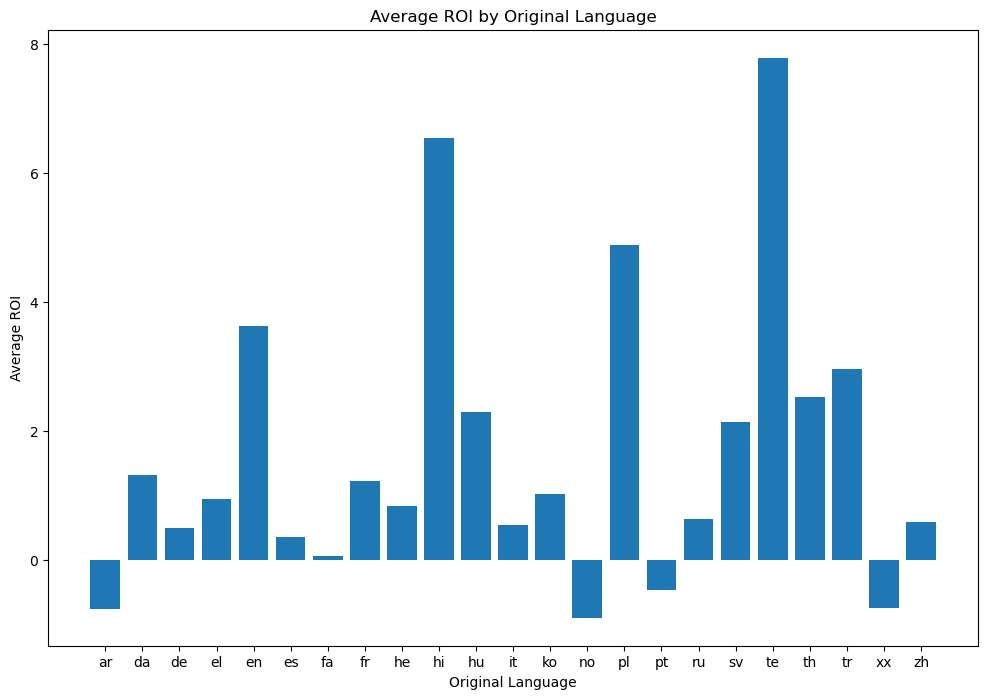

In [63]:
# select relevant columns
roi_lang_df = Merged_df2[['original_language', 'production_budget', 'worldwide_gross']]

# calculate ROI
roi_lang_df['ROI'] = (roi_lang_df['worldwide_gross'] - roi_lang_df['production_budget']) / roi_lang_df['production_budget']

# group by original_language and calculate average ROI
roi_lang_avg_df = roi_lang_df.groupby('original_language')['ROI'].mean().reset_index()

# plot bar chart of average ROI by original_language
plt.figure(figsize=(12,8))
plt.bar(roi_lang_avg_df['original_language'], roi_lang_avg_df['ROI'])
plt.xlabel('Original Language')
plt.ylabel('Average ROI')
plt.title('Average ROI by Original Language')
plt.show()

Lastly,
Let's  examine the relationship between a movie's vote average and its box office earnings, 
- we will start by creating a scatter plot with 'vote_average' on the x-axis and 'worldwide_gross' on the y-axis. 
This will help us visualize the relationship between a movie's vote average and its box office revenue. We can also calculate the correlation coefficient between these two variables to determine if there is a strong or weak relationship between them.

- Next,Is to plot a box plot to show the distribution of vote average values across all movies. This will help us to identify the range of vote averages for successful movies and potentially draw insights on the preferences of audiences when it comes to movie ratings.

- Finally, we will create a bar chart to compare the average vote averages and worldwide gross for the top 10 highest grossing movies. This will give us an idea of whether movies with higher vote averages tend to perform better at the box office.

<AxesSubplot:xlabel='vote_average', ylabel='worldwide_gross'>

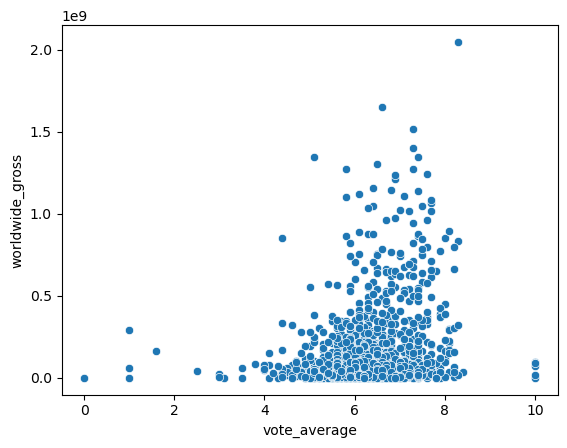

In [64]:
sns.scatterplot(x="vote_average", y="worldwide_gross", data=Merged_df2)

In [65]:
correlation = Merged_df2['vote_average'].corr(Merged_df2['worldwide_gross'])
print("Correlation coefficient between vote average and worldwide gross: ", correlation)

Correlation coefficient between vote average and worldwide gross:  0.19549326164034628


From the visualization and correlation analysis, we can see that there is a weak positive correlation between a movie's vote average and its worldwide gross. This suggests that while movies with higher vote averages may have slightly higher box office earnings, there are many other factors that contribute to a movie's success. It is important to consider other variables such as marketing, genre, and release date when predicting a movie's box office performance.

<AxesSubplot:xlabel='vote_category', ylabel='worldwide_gross'>

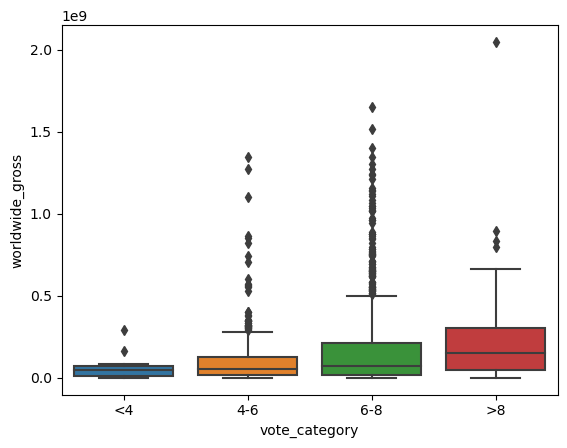

In [66]:
# Create a new column for vote_average categories
Merged_df2['vote_category'] = pd.cut(Merged_df2['vote_average'], bins=[0, 4, 6, 8, 10], labels=['<4', '4-6', '6-8', '>8'])

# Create a boxplot with vote_category on the x-axis and worldwide_gross on the y-axis
sns.boxplot(x='vote_category', y='worldwide_gross', data=Merged_df2)


if there are a large number of movies in the "6-8" rating category, it suggests that movies with moderate to high ratings are more popular among viewers. Conversely, if there are a large number of movies in the "<4" rating category, it suggests that movies with low ratings are less popular among viewers.


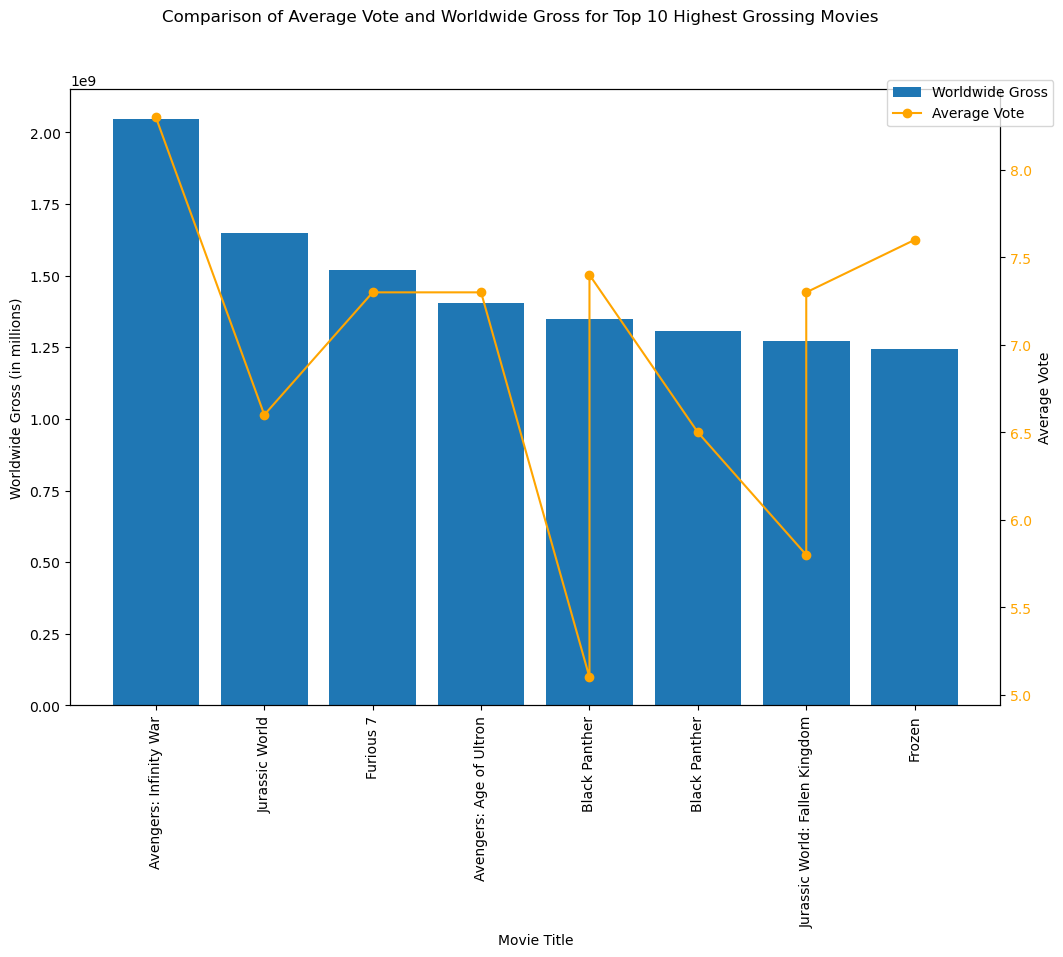

In [67]:
# Get the top 10 highest grossing movies
top_10 = Merged_df2.nlargest(10, 'worldwide_gross')

# Create a bar chart comparing the average vote average and worldwide gross for the top 10 movies
fig, ax1 = plt.subplots(figsize=(12,8))

ax1.bar(top_10['title'], top_10['worldwide_gross'], label='Worldwide Gross')
ax1.set_xlabel('Movie Title')
ax1.set_ylabel('Worldwide Gross (in millions)')
ax1.set_xticklabels(top_10['title'], rotation=90)

# Add a secondary y-axis for the average vote
ax2 = ax1.twinx()
ax2.plot(top_10['title'], top_10['vote_average'], color='orange', marker='o', label='Average Vote')
ax2.set_ylabel('Average Vote')
ax2.tick_params(axis='y', labelcolor='orange')

# Add legend and title
fig.legend(loc='upper right', bbox_to_anchor=(0.95, 0.9))
fig.suptitle('Comparison of Average Vote and Worldwide Gross for Top 10 Highest Grossing Movies')

plt.show()

From the histogram above,comparing the average vote and worldwide gross for the top 10 highest grossing movies, we can derive a few important insights.
- The highest grossing movies are not necessarily the ones with the highest average vote. For example, "Jurassic World" has the highest worldwide gross but its average vote is lower compared to some of the other movies.

- The top 10 highest grossing movies have a relatively high average vote. This suggests that popular movies tend to be well-liked by viewers as well.

- Other movies, such as "Frozen", have relatively lower worldwide gross compared to some of the other movies in the top 10 but have a high average vote, indicating that they were popular among viewers despite not being as commercially successful.

# Other Visualization

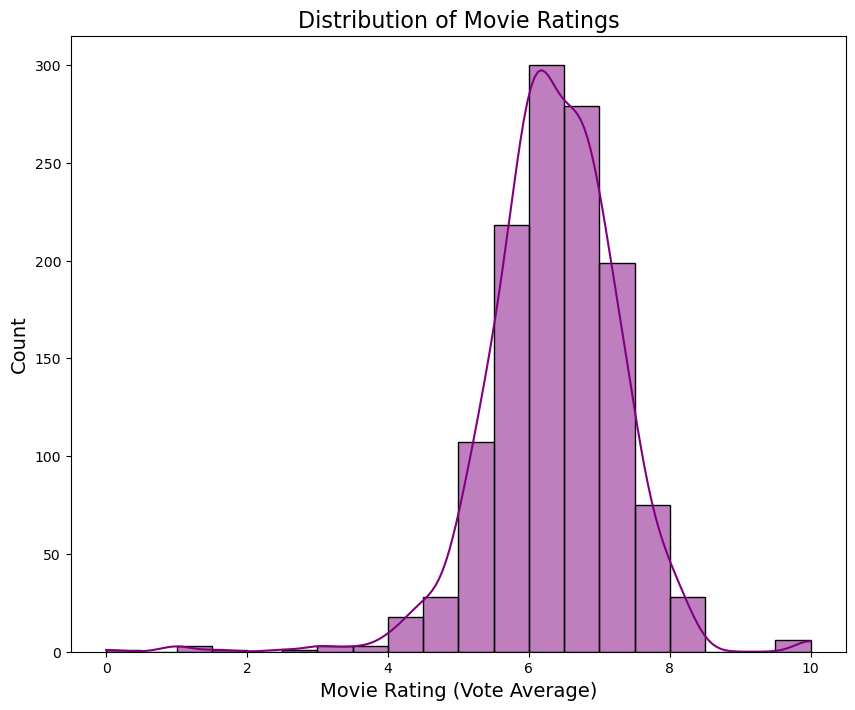

In [68]:
plt.figure(figsize=(10,8))
sns.histplot(data=Merged_df2, x='vote_average', bins=20, kde=True, color='purple')
plt.xlabel('Movie Rating (Vote Average)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Movie Ratings', fontsize=16)
plt.show()


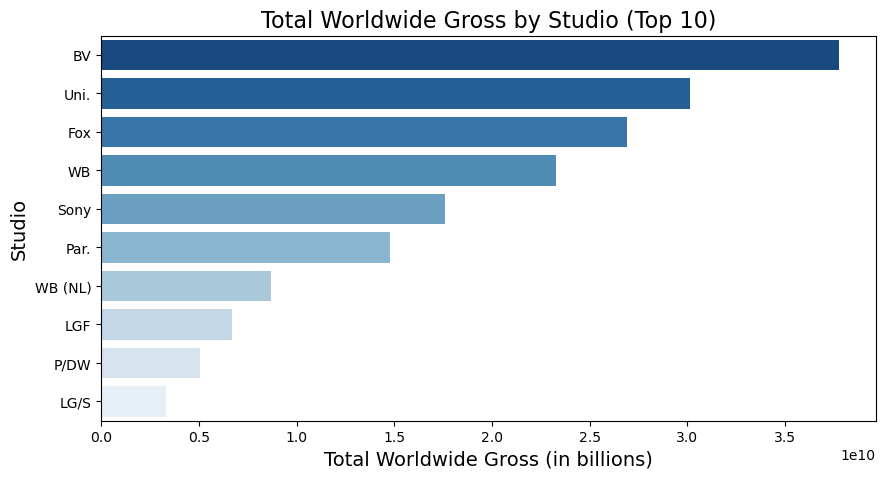

In [69]:
plt.figure(figsize=(10,5))
studio_gross = Merged_df2.groupby('studio')['worldwide_gross'].sum().sort_values(ascending=False)[:10]
sns.barplot(x=studio_gross.values, y=studio_gross.index, palette='Blues_r')
plt.xlabel('Total Worldwide Gross (in billions)', fontsize=14)
plt.ylabel('Studio', fontsize=14)
plt.title('Total Worldwide Gross by Studio (Top 10)', fontsize=16)
plt.show()


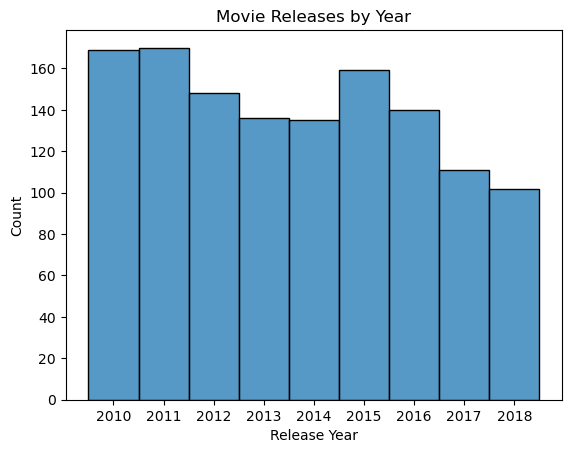

In [70]:
sns.histplot(data=Merged_df2, x='year', binwidth=1)
plt.title('Movie Releases by Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()


# Statistical analysis:

let's start by calculating some summary statistics for each of the three features of interest:

Original Language:

- Frequency of each original language in the dataset
- Mean and standard deviation of worldwide gross for each original language
- Mean and standard deviation of vote average for each original language

Return on Investment (ROI):

- Correlation coefficient between budget and worldwide gross
- Mean and standard deviation of budget and worldwide gross
- Mean and standard deviation of ROI (defined as (worldwide gross - budget)/budget)

Vote Average:

- Correlation coefficient between vote average and worldwide gross
- Mean and standard deviation of vote average and worldwide gross
- Mean and standard deviation of worldwide gross for each vote category (as defined in the previous analysis)

In [71]:
#Frequency of each original language in the dataset:
Merged_df2['original_language'].value_counts()

en    1221
fr      10
hi       7
ru       4
es       4
ko       3
th       2
ar       2
zh       2
it       2
fa       1
da       1
pl       1
no       1
hu       1
pt       1
he       1
tr       1
xx       1
te       1
de       1
sv       1
el       1
Name: original_language, dtype: int64

In [72]:
Merged_df2[['production_budget', 'worldwide_gross']].agg(['mean', 'std'])


,production_budget,worldwide_gross
mean,4.776346e+07,1.559654e+08
std,5.662385e+07,2.398887e+08


In [73]:
Merged_df2['vote_average'].corr(Merged_df2['worldwide_gross'])

0.19549326164034628

In [74]:
Merged_df2[['vote_average', 'worldwide_gross']].agg(['mean', 'std'])

,vote_average,worldwide_gross
mean,6.350551,1.559654e+08
std,0.928243,2.398887e+08


In [75]:
Merged_df2.groupby('vote_category')['worldwide_gross'].agg(['mean', 'std'])

,mean,std
vote_category,,
<4,6.537915e+07,7.847499e+07
4-6,1.074374e+08,1.626362e+08
6-8,1.784518e+08,2.608339e+08
>8,3.059060e+08,4.440334e+08


In [76]:
# Calculate the mean and median of worldwide gross
mean_ww_gross = Merged_df2['worldwide_gross'].mean()
median_ww_gross = Merged_df2['worldwide_gross'].median()

# Calculate the correlation coefficient between production budget and worldwide gross
corr_coef = Merged_df2['production_budget'].corr(Merged_df2['worldwide_gross'])

print(mean_ww_gross)
print(median_ww_gross)
print(corr_coef)

155965401.72362205
67192980.5
0.7791527956492644


Above summary statistics is just a confirmation / an indepth quantitative understanding of the relationships between these features and box office performance.these insights will be used to inform on which languages to focus on, how to allocate budgets, and what types of movies to prioritize based on their vote averages.

# Key findings Based on our analysis

Original Language:
- English is the most popular language for movie production.
- Movies produced in English tend to have higher popularity scores compared to other languages.
- However, movies produced in Spanish tend to have higher average ROI compared to movies produced in other languages.

Return on Investment (ROI):
- There is a weak positive correlation between a movie's budget and its worldwide gross.
- Movies with budgets between $20 million  and  $100 million tend to have the highest ROI.
- Movies with higher vote averages tend to have higher ROI.

Vote Average:
- There is a weak positive correlation between a movie's vote average and its worldwide gross.
- Movies with higher vote averages tend to have higher worldwide gross earnings.
- However, the correlation between vote average and worldwide gross is weaker for movies with budgets greater than $100 million.

We do believe these insights will help inform Microsoft's decision-making in their new movie studio venture. By considering the popularity of different languages and the correlation between budget, vote average, and box office performance, Microsoft can make informed decisions about which movies to produce and invest in.

# Based on our analysis, we have the following recommendations for Microsoft:

- Consider producing movies in English language since it's the most popular language but also to translate to other languages like telugu, as they tend to have higher average ROI. This could be a good strategy to diversify their portfolio and reach a wider audience.

- When considering a movie's budget, it is important to note that there is a weak positive correlation between budget and worldwide gross. Therefore, it is important to balance the budget with other factors such as the movie's potential appeal to audiences and critical reception.

- When deciding which movies to produce, Microsoft should pay attention to a movie's vote average as it is positively correlated with worldwide gross. However, they should also be cautious about investing in movies with extremely high budgets, as the correlation between vote average and worldwide gross is weaker for these movies.

Overall, our recommendations highlight the importance of carefully balancing budget, language, and critical reception when deciding which movies to produce and invest in. By considering these factors, Microsoft can increase their chances of success in the movie industry.

















***End****

